In [1]:
using Plots

In [38]:
using WebIO

In [39]:
using Interact

### funkcja generująca środowisko z pakietami żywnościowymi

In [4]:
function environment(n,m)
    Environment = zeros(Int64, n, m)
    for i in 2:3:n
        Environment[i,:] = ones(Int64, 1, m)
    end
    return Environment
end

environment (generic function with 1 method)

In [5]:
environment(20,20)

20×20 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1 

### funkcja determinująca przeżycie gołębia w trakcie ucieczki od jastrzębia (50% prawdopodobieństwa)

In [6]:
function golab_jastrzab(n_gol)
    if rand(0:1) == 0
        n_gol = n_gol - 1
    end
    return n_gol
end

golab_jastrzab (generic function with 1 method)

### funkcja determinująca stan populacji po wylosowaniu miejsc przy pakietach żywnościowych

In [7]:
#G-3
#J-8
function potyczki(n,m,macierz, g, ja)
    for i in 2:3:n, j in 1:m    
        suma = macierz[i-1,j] + macierz[i+1,j]
        if suma == 11
            g = golab_jastrzab(g)
            ja = ja + 1
        elseif suma == 6
            g = g
        elseif suma == 16 
            ja = ja - 2
        elseif suma == 3
            g += 2
        elseif suma == 8
            j += 2
        end 
    return g,ja
    end
end

potyczki (generic function with 1 method)

In [8]:
A = [3 3 8 8; 1 1 1 1; 3 3 3 8;
3 8 8 8; 1 1 1 1; 3 8 3 8]


6×4 Array{Int64,2}:
 3  3  8  8
 1  1  1  1
 3  3  3  8
 3  8  8  8
 1  1  1  1
 3  8  3  8

In [9]:
potyczki(6,4,A,8,8)


(8, 8)

In [10]:
B = [8 8 8 8 3;
1 1 1 1 1;
3 3 0 8 3;
3 3 3 8 8;
1 1 1 1 1;
8 8 0 3 3
]
#g = 10
#j = 11

6×5 Array{Int64,2}:
 8  8  8  8  3
 1  1  1  1  1
 3  3  0  8  3
 3  3  3  8  8
 1  1  1  1  1
 8  8  0  3  3

In [11]:
potyczki(6,4,B,9,10)

(9, 11)

### funkcja generująca rozstawienie ptaków w środowisku

In [12]:
function golabki(macierz, ngol)
    if ngol != 0  
        for i in 1:1:ngol
            z = findall(x -> x ==0, macierz)
            macierz[rand(z)] = 3
        end
    end
end
function jastrzabki(macierz, njas)
    if njas != 0
        for i in 1:1:njas
            z = findall(x -> x ==0, macierz)
            macierz[rand(z)] = 8
        end
    end
end

jastrzabki (generic function with 1 method)

In [13]:
mac = environment(21,21)
golabki(mac, 100)
jastrzabki(mac, 100)

In [14]:
test = environment(6,6)
golabki(test, 14)
jastrzabki(test, 10)
test

6×6 Array{Int64,2}:
 3  3  3  8  8  8
 1  1  1  1  1  1
 3  3  3  8  3  3
 8  3  8  8  3  3
 1  1  1  1  1  1
 8  3  8  3  3  8

In [15]:
mac

21×21 Array{Int64,2}:
 0  0  8  8  0  3  0  8  8  0  3  3  0  3  8  3  3  8  3  0  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  3  8  8  8  3  3  0  3  0  3  0  8  3  3  3  3  0  0  8  0
 3  8  8  0  8  8  0  8  0  3  0  0  8  8  8  3  0  8  8  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  3  0  3  0  8  3  3  0  0  8  0  3  3  3  8  3  0  0  3  8
 8  3  8  0  3  3  3  0  0  0  8  8  8  0  0  3  0  8  8  0  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  3  3  3  3  8  0  8  3  0  3  3  3  0  3  0  8  8  8  0  8
 0  3  3  8  0  0  0  8  0  8  3  8  3  3  3  0  8  3  8  3  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  8  3  3  0  0  0  3  0  8  0  8  3  3  0  0  0  8  3  8  8
 3  8  8  8  0  3  3  3  3  8  3  8  8  8  0  3  3  0  8  8  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  3  0  0  8  0  3  3  8  8  8  3  0  0  0  3  8  8  0  3  8
 3  3  0  0  0  8  3  8  3  3  0 

In [16]:
potyczki(21,21,mac,100,100)

(102, 100)

In [17]:
mac = environment(18,18)
golabki(mac, 70)
jastrzabki(mac, 90)

In [18]:
mac

18×18 Array{Int64,2}:
 8  8  8  0  8  3  8  8  0  3  8  8  3  8  8  3  8  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  0  3  3  8  3  8  8  8  8  0  0  3  0  8  8  3  8
 3  3  3  3  8  0  3  0  0  8  3  0  8  0  8  8  3  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  0  0  3  0  8  0  8  3  0  8  8  3  3  0  3  3  0
 8  3  0  3  3  0  3  0  3  0  3  0  8  8  0  3  8  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  0  8  0  0  8  0  0  0  3  3  3  3  3  8  3  8  8
 8  8  0  8  0  8  8  8  8  0  0  3  3  8  8  0  8  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  8  0  0  3  8  3  8  8  0  0  8  0  8  8  8  3  0
 8  3  0  8  8  8  0  8  0  0  0  3  0  8  8  8  8  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  3  0  3  8  8  3  3  3  3  8  8  8  3  3  3  8  8
 3  3  3  8  0  3  3  3  8  3  8  8  8  8  8  8  3  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  0  3  8  8  3  3  0  0  0  3  0  8  3  8  3  3  0

In [19]:
potyczki(18,18,mac,70,90)

(69, 91)

### funkcja sprawdzająca nadmiar populacji i ilość ptaków wysłaną na wygnanie/ fight club

funkcja/wątek do rozwinięcia

In [20]:
function check(n,m,ng, nja)
    if ng + nja > 2*n*m/3
        env_ng = Int64(round(ng/(ng+nja) * 2*n*m/3))
        env_ja = Int64(round(nja/(ng+nja) * 2*n*m/3))
        fight_g = ng - env_ng
        fight_ja = nja - env_ja
        ng = env_ng
        nja = env_ja
        return ng, nja, fight_g, fight_ja
    else
        fight_g = 0
        fight_ja = 0
        return ng, nja, fight_g, fight_ja
    end
end


check (generic function with 1 method)

In [21]:
check(9,9, 35,30)


(29, 25, 6, 5)

In [22]:
print(check(9,9,50,60))


(25, 29, 25, 31)

In [23]:
function fight_club(n_gol, n_jas)
    if (n_gol+n_jas)%2 == 0
        n = Int64((n_gol + n_jas)/2)
        M = zeros(Int64, 2, n)
        if n_gol != 0
            golabki(M,n_gol)
        end
        if n_jas!=0
            jastrzabki(M,n_jas)
        end
    else
        n = Int64((n_gol + n_jas + 1)/2) 
        M = zeros(Int64, 2, n)
        if n_gol != 0
            golabki(M,n_gol)
        end
        if n_jas!=0
            jastrzabki(M,n_jas)
        end
    end
    return M
end
        

fight_club (generic function with 1 method)

In [24]:
fight_club(3,3)

2×3 Array{Int64,2}:
 8  8  3
 8  3  3

In [25]:

function fight(macierz, n_gol, n_jas)
    for i in 1:size(macierz)[2]
        suma = macierz[1,i] + macierz[2,i]
        if suma == 6
            n_gol -= 1
        elseif suma == 16
            n_jas -= 1
        elseif suma == 11
            if rand(0:1) == 0
                n_gol -= 1
            else
                n_jas -= 1
            end
        end
    end
    return n_gol, n_jas
end

fight (generic function with 1 method)

In [26]:
fight(fight_club(3,3), 3, 3)

(2, 1)

### Generowanie środowiska z mniejszą ilością pakietów (na wypadek przykładowej suszy/ pożaru)


In [27]:
function environment_food_amount(size1 = 21, size2 = 21, amount = 100)
#ilość wieszy musi być podzielna przez 3
    if size1 % 3 != 0
        throw(DomainError(size, "incorrect size"))
    end
    Environment = zeros(Int64, size1, size2)
    A = zeros(Int64, 1, size2*(fld(size1-2,3)+1))
    A[1,1:amount] = ones(Int64, 1, amount)
    A = Random.shuffle(A)
    k = 1
    for i in 2:3:size1
        Environment[i,:] = A[1, k:(k+size1-1)]
        k += size1
    end
    return Environment
end

environment_food_amount (generic function with 4 methods)

In [28]:
function action(n, m, n_gol, n_jas, p, A, index = 1)
    
    if p == 0
        return A
    end
    
    srod = environment(n,m) ##mamy pakiety
    
    a = check(n, m, n_gol, n_jas) #sprawdzamy czy nie ma za dużo ptaszków, zwraca jako (gol_safe, jas_safe, gol_fight, jas_fight)
    n_gol = a[1]
    n_jas = a[2]

    golabki(srod, n_gol)
    jastrzabki(srod, n_jas)  ##mamy srodowisko z ptaszkami
    
    result = potyczki(n,m,srod, n_gol, n_jas) ##mamy stan populacji po potyczkach
    n_gol = result[1] ##liczba gołębi
    n_jas = result[2]
    
    ##w miedzyczasie fight club :
    
    
    b = fight(fight_club(a[3],a[4]), a[3], a[4]) #populacja po fight clubie - (gol, jas)
    
    n_gol += b[1] ##ostateczna ilosc golebi - ta bezpieczna + fight club
    n_jas += b[2] ## -||- jastrzebi
    gol_fight = b[1] ##ilość ptakow po fightcie, może się przyda c:
    jas_fight = b[2]
    
    A[index, 1] = n_gol
    A[index, 2] = n_jas
    index += 1
    println(n_gol,",", n_jas,",", gol_fight, ",",jas_fight)
    
    action(n, m, n_gol, n_jas, p-1, A, index) #i lecimy rekurencją
end

action (generic function with 2 methods)

In [29]:
A = action(9,9,30,30, 100, zeros(Int64, 100, 2))

28,29,2,1
28,26,1,1
28,24,0,0
28,24,0,0
28,25,0,0
28,23,0,0
28,23,0,0
28,21,0,0
28,19,0,0
28,19,0,0
28,19,0,0
27,20,0,0
27,20,0,0
27,20,0,0
27,20,0,0
26,21,0,0
26,21,0,0
26,21,0,0
28,21,0,0
28,21,0,0
27,22,0,0
27,23,0,0
27,24,0,0
26,25,0,0
26,26,0,0
26,27,0,0
26,28,0,0
26,29,0,0
26,27,0,1
26,28,0,0
26,28,0,0
25,29,0,0
24,30,0,0
24,31,0,0
24,29,0,1
23,30,0,0
23,31,0,0
23,29,0,0
23,30,0,0
23,31,0,0
23,31,0,0
23,29,0,0
23,29,0,0
23,30,0,0
22,31,0,0
21,32,0,0
21,33,0,0
21,31,0,0
21,29,0,0
21,30,0,0
21,31,0,0
21,32,0,0
20,33,0,0
20,31,0,0
20,29,0,0
19,30,0,0
19,31,0,0
18,32,0,0
18,30,0,0
18,28,0,0
18,29,0,0
17,30,0,0
17,30,0,0
16,31,0,0
15,32,0,0
15,30,0,0
15,31,0,0
15,31,0,0
15,32,0,0
15,33,0,0
15,31,0,0
14,32,0,0
14,30,0,0
14,31,0,0
14,31,0,0
14,31,0,0
14,31,0,0
14,31,0,0
14,32,0,0
16,32,0,0
15,33,0,0
15,31,0,0
17,31,0,0
17,31,0,0
17,32,0,0
17,32,0,0
17,32,0,0
17,30,0,0
17,30,0,0
17,28,0,0
17,26,0,0
17,24,0,0
17,24,0,0
17,25,0,0
17,23,0,0
17,21,0,0
17,19,0,0
17,19,0,0
17,19,0,0
17,19,0,0


100×2 Array{Int64,2}:
 28  29
 28  26
 28  24
 28  24
 28  25
 28  23
 28  23
 28  21
 28  19
 28  19
 28  19
 27  20
 27  20
  ⋮  
 17  30
 17  28
 17  26
 17  24
 17  24
 17  25
 17  23
 17  21
 17  19
 17  19
 17  19
 17  19

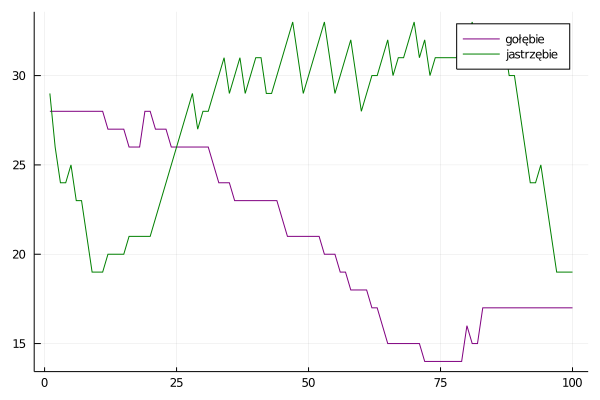

In [41]:
plot(1:size(A)[1], A[:, 1], label="gołębie", color= :purple)
plot!(1:size(A)[1], A[:, 2], label="jastrzębie", color= :green)

In [42]:
@manipulate for time = 2:1:100
    plot(1:time, A[1:time, 1], label="gołębie", color= :purple)
    plot!(1:time, A[1:time, 2], label="jastrzębie", color= :green)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 99,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mazur\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mazur\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mazur\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mazur\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mazur\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000003583eb30, Task (runnable) @0x000000003583eb30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\"